# CA2 - Classification Using Neural Networks

In [1]:
# Load the Libraries for data manipulation
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [2]:
# Load the csv file
df = pd.read_csv('glass_data.csv')

In [3]:
# Check first 5 record
df.head()

,id,ri,na,mg,al,si,k,ca,ba,fe,type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
# check the row and column count
df.shape

(214, 11)

In [5]:
#Check data type for all the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      214 non-null    int64  
 1   ri      214 non-null    float64
 2   na      214 non-null    float64
 3   mg      214 non-null    float64
 4   al      214 non-null    float64
 5   si      214 non-null    float64
 6   k       214 non-null    float64
 7   ca      214 non-null    float64
 8   ba      214 non-null    float64
 9   fe      214 non-null    float64
 10  type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [6]:
# check for any null values or missing data
df.isnull().sum()

id      0
ri      0
na      0
mg      0
al      0
si      0
k       0
ca      0
ba      0
fe      0
type    0
dtype: int64

In [7]:
# Replace value 5 to 4, 6 to 5, 7 to 6 in 'type'
df['type'] = df['type'].replace(1,0)
df['type'] = df['type'].replace(2,1)
df['type'] = df['type'].replace(3,2)
df['type'] = df['type'].replace(5,3)
df['type'] = df['type'].replace(6,4)
df['type'] = df['type'].replace(7,5)

In [8]:
# Display unique values in each column and their count
for col in df:
    unique_value = df[col].value_counts()
    print(f"Unique Number of value in Column '{col}' is '{df[col].nunique()}':")
    print("----------------------")
    print(unique_value.to_string())
    print("\n")

Unique Number of value in Column 'id' is '214':
----------------------
id
1      1
135    1
137    1
138    1
139    1
140    1
141    1
142    1
143    1
144    1
145    1
146    1
147    1
148    1
149    1
150    1
151    1
152    1
153    1
154    1
155    1
156    1
157    1
158    1
159    1
136    1
134    1
161    1
133    1
110    1
111    1
112    1
113    1
114    1
115    1
116    1
117    1
118    1
119    1
120    1
121    1
122    1
123    1
124    1
125    1
126    1
127    1
128    1
129    1
130    1
131    1
132    1
160    1
162    1
2      1
189    1
191    1
192    1
193    1
194    1
195    1
196    1
197    1
198    1
199    1
200    1
201    1
202    1
203    1
204    1
205    1
206    1
207    1
208    1
209    1
210    1
211    1
212    1
213    1
190    1
188    1
163    1
187    1
164    1
165    1
166    1
167    1
168    1
169    1
170    1
171    1
172    1
173    1
174    1
175    1
176    1
177    1
178    1
179    1
180    1
181    1
182    1
183    1

In [9]:
# drop the column 'ID' since it has all unique value and only incremental number which denotes row count
df_original = df
df = df.drop('id', axis=1)

In [10]:
# check the row and column count
df.shape

(214, 10)

In [11]:
# check for duplicate values
df.duplicated().sum()

1

In [12]:
# find the row no where duplicated entry exists. this is marked with True
df.duplicated().to_string()

'0      False\n1      False\n2      False\n3      False\n4      False\n5      False\n6      False\n7      False\n8      False\n9      False\n10     False\n11     False\n12     False\n13     False\n14     False\n15     False\n16     False\n17     False\n18     False\n19     False\n20     False\n21     False\n22     False\n23     False\n24     False\n25     False\n26     False\n27     False\n28     False\n29     False\n30     False\n31     False\n32     False\n33     False\n34     False\n35     False\n36     False\n37     False\n38     False\n39      True\n40     False\n41     False\n42     False\n43     False\n44     False\n45     False\n46     False\n47     False\n48     False\n49     False\n50     False\n51     False\n52     False\n53     False\n54     False\n55     False\n56     False\n57     False\n58     False\n59     False\n60     False\n61     False\n62     False\n63     False\n64     False\n65     False\n66     False\n67     False\n68     False\n69     False\n70     False\n71   

In [13]:
# display the duplicated row number and content
dup = df[df.duplicated()]
print(dup)

         ri     na    mg    al     si     k    ca   ba   fe  type
39  1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.0  0.0     0


In [14]:
# drop the duplicated entry leaving first occurence
df.drop_duplicates(keep= 'first', inplace=True)
df.shape

(213, 10)

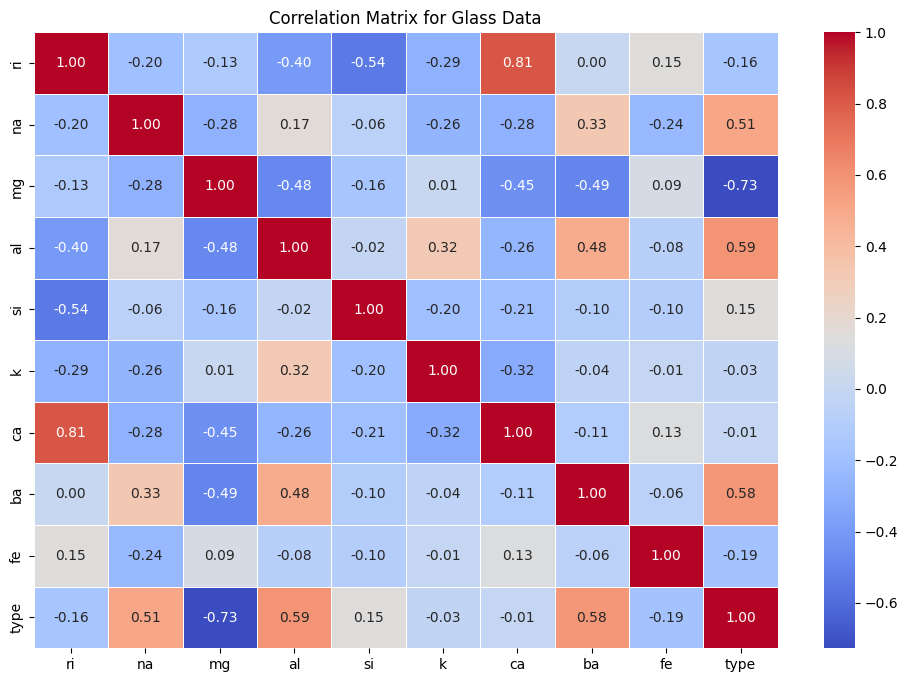

In [17]:
# # Correlation heatmap to check the features that are of high importance to dependent variable
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Glass Data")
plt.show()

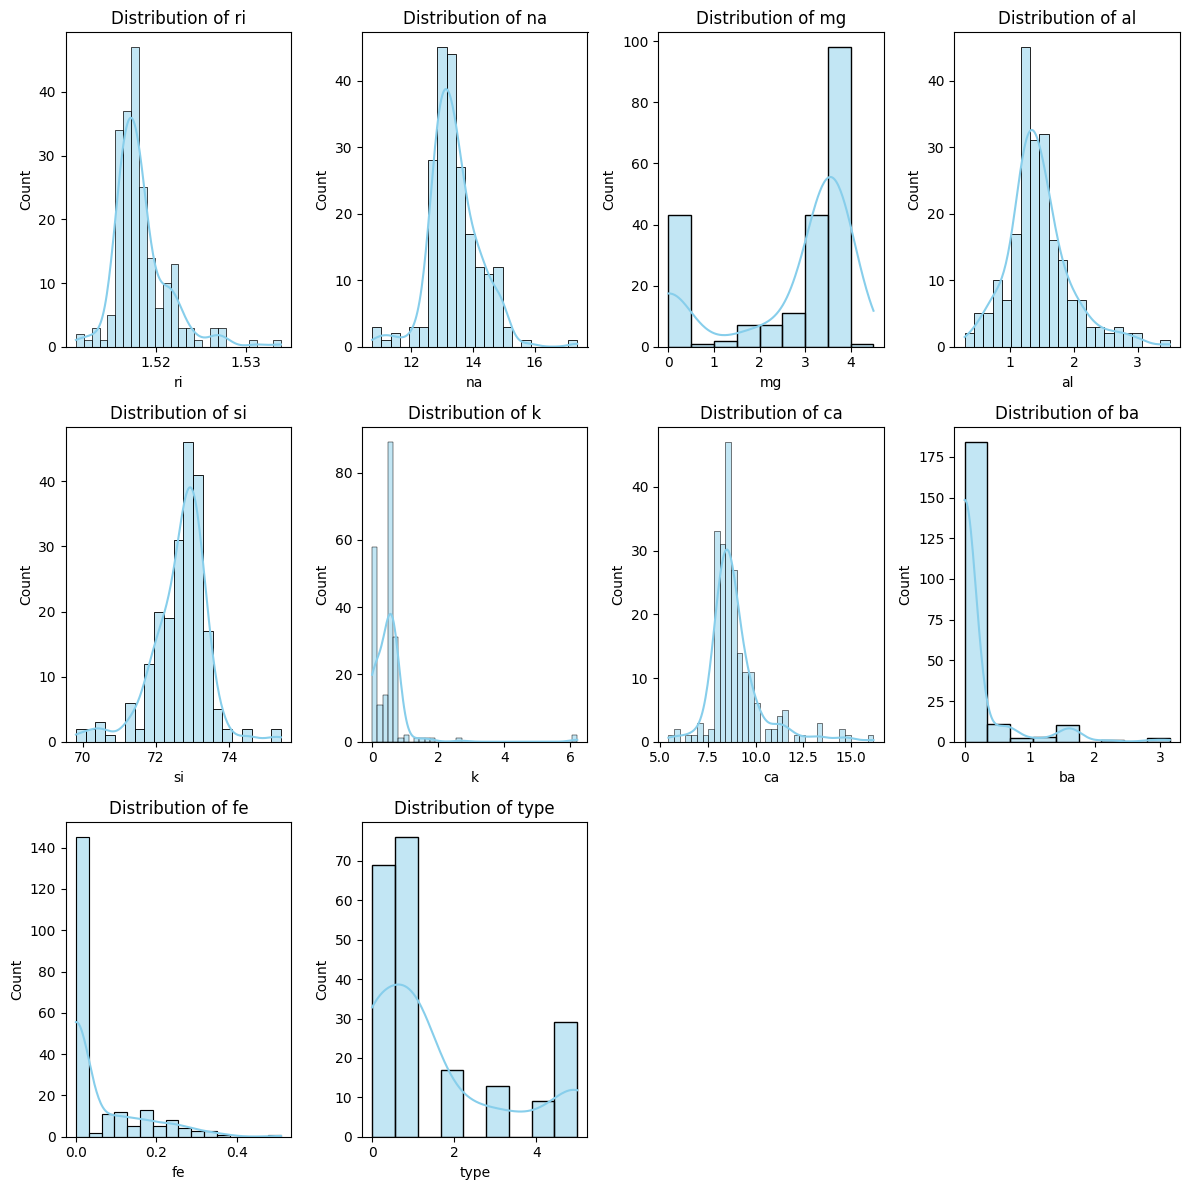

In [18]:
# # Distribution plot for all columns
#df.hist()

# Adjust grid size for the number of features
n_features = len(df.columns)
n_cols = 4  # Number of columns
n_rows = (n_features // n_cols) + (n_features % n_cols > 0)  # Dynamic number of rows

plt.figure(figsize=(12, n_rows * 4))
for i, feature in enumerate(df.columns, 1):
    plt.subplot(n_rows, n_cols, i)  # Create a grid of subplots dynamically
    sns.histplot(df[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [19]:
# Check Descriptive Statistics to find the min, max, mean and quartile values
df.describe()

,ri,na,mg,al,si,k,ca,ba,fe,type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,1.549296
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,1.708376
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,0.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,1.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,2.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,5.000000


# ANN Model Building

In [20]:
# Load libraries for Model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.base import BaseEstimator, ClassifierMixin
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [21]:
# Split train test data

x=df[['ri', 'na', 'mg', 'al', 'si', 'k', 'ca', 'ba', 'fe']]
y= df["type"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=42)
print(f"Shape of Training Data: '{x_train.shape, y_train.shape}' ")
print(f"Shape of Test Data: '{x_test.shape, y_test.shape}' ")


Shape of Training Data: '((170, 9), (170,))' 
Shape of Test Data: '((43, 9), (43,))' 


In [22]:
# Normalize the input/independent variables
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)  # Apply same transformation to test data

print('Sample Training data after normalization:', x_train_scale[:1])
print('Sample Test data after normalization:', x_test_scale[:1])

Sample Training data after normalization: [[-0.88541869 -0.68469054  0.53794711  1.56757365  0.0510769   0.89150593
  -0.71937041 -0.32871079 -0.57888487]]
Sample Test data after normalization: [[-0.34686365 -0.51487359  0.59614056 -0.10057984  0.48067417  0.4779834
  -0.4162812  -0.32871079  0.57518198]]


In [23]:
# ANN Model
model = Sequential()

# Add the input layer and the first hidden layer (using ReLU activation)
model.add(Dense(64, input_dim=x_train_scale.shape[1], activation='relu'))

# Add the second hidden layer
model.add(Dense(32, activation='relu'))

# Add the output layer: since it's multi-class classification, we use softmax
model.add(Dense(len(np.unique(y_train)), activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,918 (11.40 KB)

 Trainable params: 2,918 (11.40 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
# Train the model on the normalized data
history = model.fit(x_train_scale, y_train, epochs=50, batch_size=32) # validation_data=(x_test, y_test))

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0757 - loss: 1.9151
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1923 - loss: 1.8067
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3363 - loss: 1.7149
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4867 - loss: 1.5969
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5297 - loss: 1.5043
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5775 - loss: 1.4303
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5983 - loss: 1.3504
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6628 - loss: 1.2741
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6175 - loss: 1.2106
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6265 - loss: 1.1630
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6275 - loss: 1.1072
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6326 - loss: 1.0597
E

In [26]:
# Predict on the test data
y_pred = np.argmax(model.predict(x_test_scale), axis=-1)  # Convert softmax outputs to class labels

# Print the classification report
print(classification_report(y_test, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        10
           1       0.56      0.67      0.61        15
           2       0.00      0.00      0.00         3
           3       0.50      0.33      0.40         3
           4       1.00      1.00      1.00         3
           5       0.88      0.78      0.82         9

    accuracy                           0.60        43
   macro avg       0.57      0.55      0.55        43
weighted avg       0.60      0.60      0.60        43



In [27]:
# Function to creat model layers
def ann_model(neurons, layers, activation, loss, optimizer):

    model = Sequential()

    # Input layer and 1st hidden layer
    model.add(Dense(neurons, input_dim=x_train_scale.shape[1], activation=activation))

    # additional hidden layers
    for layers in range(layers):
        neurons_hl = neurons//2 #half the neurons count as in additional hidden layers
        model.add(Dense(neurons_hl, activation=activation))

    # output layer
    model.add(Dense(len(np.unique(y)), activation='softmax'))

    # compile the model
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model
        

In [28]:
# Initialize early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [31]:
# Hyper parameters using GridSearchCV
param_grid = {
    'model__neurons': [32, 64],
    'model__layers': [0, 1, 2],
    'epochs': [50, 80, 150],
    'model__activation': ['relu', 'tanh', 'sigmoid'],
    'model__loss': ['sparse_categorical_crossentropy', 'categorical_crossentropy'],
    'model__optimizer': ['adam', 'sgd']    
}

model = KerasClassifier(build_fn= ann_model, verbose=0)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid)
grid_search_result = grid_search.fit(x_train_scale, y_train, callbacks=[early_stopping])

# random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, 
#                                   n_iter=10, cv=3, verbose=1, random_state=42)

# # Run the search on the resampled training data
# random_search_result = random_search.fit(x_train_scale, y_train, 
#                                          validation_data=(x_test, y_test), callbacks=[early_stopping])

In [32]:
print("Best Score:", grid_search.best_score_)
print("Best Parameter selected:", grid_search.best_params_)

best_model = grid_search.best_estimator_

print("Train data Accuracy:", best_model.score(x_train_scale, y_train))
print("Test data  Accuracy:", best_model.score(x_test_scale, y_test))

Best Score: 0.6941176470588235
Best Parameter selected: {'epochs': 150, 'model__activation': 'relu', 'model__layers': 2, 'model__loss': 'sparse_categorical_crossentropy', 'model__neurons': 64, 'model__optimizer': 'adam'}
Train data Accuracy: 0.9529411764705882
Test data  Accuracy: 0.7906976744186046


In [30]:
print("Best Score:", grid_search.best_score_)
print("Best Parameter selected:", grid_search.best_params_)

best_model = grid_search.best_estimator_

print("Train data Accuracy:", best_model.score(x_train_scale, y_train))
print("Test data  Accuracy:", best_model.score(x_test_scale, y_test))

Best Score: 0.705827067669173
Best Parameter selected: {'epochs': 80, 'model__activation': 'relu', 'model__layers': 1, 'model__loss': 'sparse_categorical_crossentropy', 'model__neurons': 64, 'model__optimizer': 'adam'}
Train data Accuracy: 0.8411764705882353
Test data  Accuracy: 0.6511627906976745
